In [ ]:
import pandas as pd #DataFrames (；⌣̀_⌣́)
import numpy as np #NaNs \(★ω★)/
import matplotlib.pyplot as plt #graphics ٩(ఠ益ఠ)۶

#1.1 Analyzing data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv',low_memory=False) #we put our file in Google drive for easy access from any device
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender_1       1000 non-null   object
 1   brand_1        1000 non-null   object
 2   age_1          1000 non-null   object
 3   qd_pf1_1       1000 non-null   object
 4   qd_pf2_1       1000 non-null   object
 5   qd_pf3_1       1000 non-null   object
 6   qd_ft1_1       1000 non-null   object
 7   qd_ft2_1       1000 non-null   object
 8   qd_ft3_1       1000 non-null   object
 9   qd_as1_1       1000 non-null   object
 10  qd_as2_1       1000 non-null   object
 11  qd_as3_1       1000 non-null   object
 12  qd_sr1_1       1000 non-null   object
 13  qd_sr2_1       1000 non-null   object
 14  qd_sr3_1       1000 non-null   object
 15  qd_re1_1       1000 non-null   object
 16  qd_re2_1       1000 non-null   object
 17  qd_re3_1       1000 non-null   object
 18  qd_du1_1       1000 non-null 

In [ ]:
df.head()

,gender_1,brand_1,age_1,qd_pf1_1,qd_pf2_1,qd_pf3_1,qd_ft1_1,qd_ft2_1,qd_ft3_1,qd_as1_1,...,sat3_2,sat2_2,wtp1_2,wtp3_2,wtp2_2,ri1_2,ri2_2,ACSI1_2,ACSI2_2,ACSI3_2
0,1,4,3,5,4,4,3,4,3,4,...,7,7,4,5,5,6,7,9.00,9.00,10.00
1,2,2,5,5,5,5,4,4,4,4,...,6,6,5,5,4,6,6,8.00,8.00,2.00
2,1,1,5,4,5,4,5,4,3,4,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!
3,2,1,4,5,5,5,5,5,5,4,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!
4,2,1,4,4,4,4,3,3,3,4,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!


#1.2 Creating a copy and cleaning data

In [ ]:
dfc=df.copy() #we are working with a copy to have original df as backup
dfc.replace('#NULL!',np.nan,inplace=True) #for correct work of dropna() method
dfc.dropna(how='all',inplace=True) #we don't need lines where we have no data
dfc=dfc.applymap(pd.to_numeric,errors='ignore') #converting for further work

In [ ]:
#we'll need this later ٩(◕‿◕｡)۶
print(list(dfc['brand_1']).count(1)/list(dfc['brand_1']).count(2))
print(list(dfc.dropna()['brand_1']).count(1)/list(dfc.dropna()['brand_1']).count(2))
#we can see that statistically between wave1 and wave2 there is no difference in apple to samsung ratio

1.966542750929368
1.884297520661157


In [ ]:
dfc.info() #making sure all the types are not object

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 0 to 999
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender_1       997 non-null    int64  
 1   brand_1        997 non-null    int64  
 2   age_1          997 non-null    int64  
 3   qd_pf1_1       997 non-null    int64  
 4   qd_pf2_1       997 non-null    int64  
 5   qd_pf3_1       997 non-null    int64  
 6   qd_ft1_1       997 non-null    int64  
 7   qd_ft2_1       997 non-null    int64  
 8   qd_ft3_1       997 non-null    int64  
 9   qd_as1_1       997 non-null    int64  
 10  qd_as2_1       997 non-null    int64  
 11  qd_as3_1       997 non-null    int64  
 12  qd_sr1_1       997 non-null    int64  
 13  qd_sr2_1       997 non-null    int64  
 14  qd_sr3_1       997 non-null    int64  
 15  qd_re1_1       997 non-null    int64  
 16  qd_re2_1       997 non-null    int64  
 17  qd_re3_1       997 non-null    int64  
 18  qd_du1_1       

In [ ]:
#since we know that all the nans in the 2 wave are only in the lines with no data, it will be wise not to restore these values
#because if we want to gain information we only need the real data
#we know that from Excel table

#1.3 Getting descriptives

In [ ]:
dfc.describe()

,gender_1,brand_1,age_1,qd_pf1_1,qd_pf2_1,qd_pf3_1,qd_ft1_1,qd_ft2_1,qd_ft3_1,qd_as1_1,...,sat3_2,sat2_2,wtp1_2,wtp3_2,wtp2_2,ri1_2,ri2_2,ACSI1_2,ACSI2_2,ACSI3_2
count,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,...,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000
mean,1.552658,1.750251,4.695085,4.263791,4.346038,4.298897,3.908726,3.876630,3.561685,4.096289,...,6.069663,5.800000,4.458427,4.298876,4.182022,5.262921,5.386517,8.110112,8.224719,6.993258
std,0.497469,0.955229,1.299253,0.768103,0.756244,0.749115,0.878511,0.859523,0.881228,0.808313,...,1.300416,1.323046,1.637456,1.640733,1.608155,1.496421,1.468528,1.565107,1.676230,3.073785
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
25%,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,...,6.000000,5.000000,4.000000,3.000000,3.000000,4.000000,4.000000,7.000000,7.000000,4.000000
50%,2.000000,1.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000,...,6.000000,6.000000,5.000000,4.000000,4.000000,6.000000,6.000000,8.000000,9.000000,8.000000
75%,2.000000,2.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,...,7.000000,7.000000,6.000000,6.000000,5.000000,6.000000,7.000000,9.000000,9.000000,10.000000
max,2.000000,4.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,10.000000,10.000000,10.000000


#2. Creating new variables

In [ ]:
#for every column that has several variations (1_1,2_2,Etc.) we make a new column of mean values
for column in dfc.columns:
  if '3_1' in column:
    dfc.insert(dfc.columns.get_loc(column)+1,column[:column.index('3')].upper()+'1',dfc[[column.replace('3','1'),column.replace('3','2'),column]].mean(axis=1).round())
  if '3_2' in column:
    dfc.insert(dfc.columns.get_loc(column)+1,column[:column.index('3')].upper()+'2',dfc[[column.replace('3','1'),column.replace('3','2'),column]].mean(axis=1).round())

#separate mean-ing of ri because they don't fit in the triplet signature (ri has only two variations)
dfc.insert(dfc.columns.get_loc('ri2_1')+1,'RI1',dfc[['ri1_1','ri2_1']].mean(axis=1).round())
dfc.insert(dfc.columns.get_loc('ri2_2')+1,'RI2',dfc[['ri1_2','ri2_2']].mean(axis=1).round())

In [ ]:
dfc.head() #checking if new columns were inserted and were inserted in the right place(right next to initial columns)

,gender_1,brand_1,age_1,qd_pf1_1,qd_pf2_1,qd_pf3_1,QD_PF1,qd_ft1_1,qd_ft2_1,qd_ft3_1,...,wtp3_2,WTP2,wtp2_2,ri1_2,ri2_2,RI2,ACSI1_2,ACSI2_2,ACSI3_2,ACSI2
0,1,4,3,5,4,4,4.0,3,4,3,...,5.0,5.0,5.0,6.0,7.0,6.0,9.0,9.0,10.0,9.0
1,2,2,5,5,5,5,5.0,4,4,4,...,5.0,5.0,4.0,6.0,6.0,6.0,8.0,8.0,2.0,6.0
2,1,1,5,4,5,4,4.0,5,4,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,1,4,5,5,5,5.0,5,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,1,4,4,4,4,4.0,3,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#3.1 Cross-sectional regression analysis for wave 2

In [ ]:
import statsmodels.api as sm #gives us OLS method (basically regression analysis)
#using dropna() method because we know that in Wave 2 all the nans are consistent i.e. if theres a nan in a row we know for sure that the whole row (only for wave 2) is nan
x=dfc.dropna()[[column for column in dfc.columns if 'Q' in column and '2' in column or column == 'SAT2']] #taking only quality-representing columns and SAT
x=sm.add_constant(x)
y_wtp = dfc['WTP2'].dropna()
y_ri = dfc['RI2'].dropna()
model_wtp = sm.OLS(y_wtp, x).fit()
print("Regression Analysis for Willingness to Pay")
print(model_wtp.summary())
model_ri = sm.OLS(y_ri, x).fit()
print("\nRegression Analysis for Repurchase Intention:")
print(model_ri.summary())

Regression Analysis for Willingness to Pay
                            OLS Regression Results                            
Dep. Variable:                   WTP2   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     28.34
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           1.11e-38
Time:                        18:46:31   Log-Likelihood:                -715.87
No. Observations:                 445   AIC:                             1452.
Df Residuals:                     435   BIC:                             1493.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

#3.1.1 Analysis for apple and samsung

In [ ]:
dfc_apple=dfc[dfc['brand_1']==1]
x=dfc_apple.dropna()[[column for column in dfc_apple.columns if 'q' in column and column.endswith('2') or column == 'SAT2']]
x=sm.add_constant(x)
y_wtp = dfc_apple['WTP2'].dropna()
y_ri = dfc_apple['RI2'].dropna()
model_wtp = sm.OLS(y_wtp, x).fit()
print("Regression Analysis for Willingness to Pay")
print(model_wtp.summary())
model_ri = sm.OLS(y_ri, x).fit()
print("\nRegression Analysis for Repurchase Intention:")
print(model_ri.summary())

Regression Analysis for Willingness to Pay
                            OLS Regression Results                            
Dep. Variable:                   WTP2   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     7.584
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           4.05e-18
Time:                        18:46:31   Log-Likelihood:                -329.85
No. Observations:                 228   AIC:                             711.7
Df Residuals:                     202   BIC:                             800.9
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

In [ ]:
dfc_samsung=dfc[dfc['brand_1']==2]
x=dfc_samsung.dropna()[[column for column in dfc_samsung.columns if 'Q' in column and '2' in column or column == 'SAT2']]
x=sm.add_constant(x)
y_wtp = dfc_samsung['WTP2'].dropna()
y_ri = dfc_samsung['RI2'].dropna()
model_wtp = sm.OLS(y_wtp, x).fit()
print("Regression Analysis for Willingness to Pay")
print(model_wtp.summary())
model_ri = sm.OLS(y_ri, x).fit()
print("\nRegression Analysis for Repurchase Intention:")
print(model_ri.summary())

Regression Analysis for Willingness to Pay
                            OLS Regression Results                            
Dep. Variable:                   WTP2   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     6.972
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           6.31e-08
Time:                        18:46:31   Log-Likelihood:                -180.75
No. Observations:                 121   AIC:                             381.5
Df Residuals:                     111   BIC:                             409.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

#3.2 Longitudinal regression analysis

In [ ]:
x=dfc.dropna()[[column for column in dfc.columns if 'Q' in column and '1' in column or column == 'SAT1']]
x=sm.add_constant(x)
y_wtp = dfc['WTP2'].dropna()
y_ri = dfc['RI2'].dropna()
model_wtp = sm.OLS(y_wtp, x).fit()
print("Regression Analysis for Willingness to Pay")
print(model_wtp.summary())
model_ri = sm.OLS(y_ri, x).fit()
print("\nRegression Analysis for Repurchase Intention:")
print(model_ri.summary())

Regression Analysis for Willingness to Pay
                            OLS Regression Results                            
Dep. Variable:                   WTP2   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     20.78
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           3.51e-29
Time:                        18:46:31   Log-Likelihood:                -738.98
No. Observations:                 445   AIC:                             1498.
Df Residuals:                     435   BIC:                             1539.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

#3.2.1 Analysis for apple and samsung

In [ ]:
x=dfc_apple.dropna()[[column for column in dfc_apple.columns if 'Q' in column and '1' in column or column == 'SAT1']]
x=sm.add_constant(x)
y_wtp = dfc_apple['WTP2'].dropna()
y_ri = dfc_apple['RI2'].dropna()
model_wtp = sm.OLS(y_wtp, x).fit()
print("Regression Analysis for Willingness to Pay")
print(model_wtp.summary())
model_ri = sm.OLS(y_ri, x).fit()
print("\nRegression Analysis for Repurchase Intention:")
print(model_ri.summary())

Regression Analysis for Willingness to Pay
                            OLS Regression Results                            
Dep. Variable:                   WTP2   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     9.313
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           6.10e-12
Time:                        18:46:31   Log-Likelihood:                -368.23
No. Observations:                 228   AIC:                             756.5
Df Residuals:                     218   BIC:                             790.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

In [ ]:
x=dfc_samsung.dropna()[[column for column in dfc_samsung.columns if 'Q' in column and '1' in column or column == 'SAT1']]
x=sm.add_constant(x)
y_wtp = dfc_samsung['WTP2'].dropna()
y_ri = dfc_samsung['RI2'].dropna()
model_wtp = sm.OLS(y_wtp, x).fit()
print("Regression Analysis for Willingness to Pay")
print(model_wtp.summary())
model_ri = sm.OLS(y_ri, x).fit()
print("\nRegression Analysis for Repurchase Intention:")
print(model_ri.summary())

Regression Analysis for Willingness to Pay
                            OLS Regression Results                            
Dep. Variable:                   WTP2   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     5.562
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           2.58e-06
Time:                        18:46:31   Log-Likelihood:                -185.34
No. Observations:                 121   AIC:                             390.7
Df Residuals:                     111   BIC:                             418.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

#4.1 Cross_sectional analysis for olds (wave 1)

In [ ]:
x=dfc[[column for column in dfc.columns if 'old' in column and '1' in column or column == 'SAT1']]
x=sm.add_constant(x)
y_wtp = dfc['WTP1']
y_ri = dfc['RI1']
model_wtp = sm.OLS(y_wtp, x).fit()
print("Regression Analysis for Willingness to Pay")
print(model_wtp.summary())
model_ri = sm.OLS(y_ri, x).fit()
print("\nRegression Analysis for Repurchase Intention:")
print(model_ri.summary())

Regression Analysis for Willingness to Pay
                            OLS Regression Results                            
Dep. Variable:                   WTP1   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     89.79
Date:                Thu, 20 Jun 2024   Prob (F-statistic):          9.05e-112
Time:                        18:46:31   Log-Likelihood:                -1598.9
No. Observations:                 997   AIC:                             3216.
Df Residuals:                     988   BIC:                             3260.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
con

#4.1.1 Analysis for apple and samsung

In [ ]:
x=dfc_apple[[column for column in dfc_apple.columns if 'old' in column and '1' in column or column == 'SAT1']]
x=sm.add_constant(x)
y_wtp = dfc_apple['WTP1']
y_ri = dfc_apple['RI1']
model_wtp = sm.OLS(y_wtp, x).fit()
print("Regression Analysis for Willingness to Pay")
print(model_wtp.summary())
model_ri = sm.OLS(y_ri, x).fit()
print("\nRegression Analysis for Repurchase Intention:")
print(model_ri.summary())

Regression Analysis for Willingness to Pay
                            OLS Regression Results                            
Dep. Variable:                   WTP1   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     46.22
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           4.90e-56
Time:                        18:46:31   Log-Likelihood:                -822.95
No. Observations:                 529   AIC:                             1664.
Df Residuals:                     520   BIC:                             1702.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
con

In [ ]:
x=dfc_samsung[[column for column in dfc_samsung.columns if 'old' in column and '1' in column or column == 'SAT1']]
x=sm.add_constant(x)
y_wtp = dfc_samsung['WTP1']
y_ri = dfc_samsung['RI1']
model_wtp = sm.OLS(y_wtp, x).fit()
print("Regression Analysis for Willingness to Pay")
print(model_wtp.summary())
model_ri = sm.OLS(y_ri, x).fit()
print("\nRegression Analysis for Repurchase Intention:")
print(model_ri.summary())

Regression Analysis for Willingness to Pay
                            OLS Regression Results                            
Dep. Variable:                   WTP1   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     19.96
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           2.05e-23
Time:                        18:46:32   Log-Likelihood:                -412.74
No. Observations:                 269   AIC:                             843.5
Df Residuals:                     260   BIC:                             875.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
con

#4.2 Wave 2

In [ ]:
x=dfc.dropna()[[column for column in dfc.columns if 'old' in column and '2' in column or column == 'SAT2']]
x=sm.add_constant(x)
y_wtp = dfc['WTP2'].dropna()
y_ri = dfc['RI2'].dropna()
model_wtp = sm.OLS(y_wtp, x).fit()
print("Regression Analysis for Willingness to Pay")
print(model_wtp.summary())
model_ri = sm.OLS(y_ri, x).fit()
print("\nRegression Analysis for Repurchase Intention:")
print(model_ri.summary())

Regression Analysis for Willingness to Pay
                            OLS Regression Results                            
Dep. Variable:                   WTP2   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     182.5
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           4.58e-35
Time:                        18:46:32   Log-Likelihood:                -741.79
No. Observations:                 445   AIC:                             1488.
Df Residuals:                     443   BIC:                             1496.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

#4.2.1 Analysis for apple and samsung

In [ ]:
x=dfc_apple.dropna()[[column for column in dfc_apple.columns if 'old' in column and '2' in column or column == 'SAT2']]
x=sm.add_constant(x)
y_wtp = dfc_apple['WTP2'].dropna()
y_ri = dfc_apple['RI2'].dropna()
model_wtp = sm.OLS(y_wtp, x).fit()
print("Regression Analysis for Willingness to Pay")
print(model_wtp.summary())
model_ri = sm.OLS(y_ri, x).fit()
print("\nRegression Analysis for Repurchase Intention:")
print(model_ri.summary())

Regression Analysis for Willingness to Pay
                            OLS Regression Results                            
Dep. Variable:                   WTP2   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     115.8
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           4.58e-22
Time:                        18:46:32   Log-Likelihood:                -358.17
No. Observations:                 228   AIC:                             720.3
Df Residuals:                     226   BIC:                             727.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

In [ ]:
x=dfc_samsung.dropna()[[column for column in dfc_samsung.columns if 'old' in column and '2' in column or column == 'SAT2']]
x=sm.add_constant(x)
y_wtp = dfc_samsung['WTP2'].dropna()
y_ri = dfc_samsung['RI2'].dropna()
model_wtp = sm.OLS(y_wtp, x).fit()
print("Regression Analysis for Willingness to Pay")
print(model_wtp.summary())
model_ri = sm.OLS(y_ri, x).fit()
print("\nRegression Analysis for Repurchase Intention:")
print(model_ri.summary())

Regression Analysis for Willingness to Pay
                            OLS Regression Results                            
Dep. Variable:                   WTP2   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     22.82
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           5.13e-06
Time:                        18:46:32   Log-Likelihood:                -197.25
No. Observations:                 121   AIC:                             398.5
Df Residuals:                     119   BIC:                             404.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

#4.3 Longitudinal analysis

In [ ]:
x=dfc.dropna()[[column for column in dfc.columns if 'old' in column and '1' in column or column == 'SAT1']]
x=sm.add_constant(x)
y_wtp = dfc['WTP2'].dropna()
y_ri = dfc['RI2'].dropna()
model_wtp = sm.OLS(y_wtp, x).fit()
print("Regression Analysis for Willingness to Pay")
print(model_wtp.summary())
model_ri = sm.OLS(y_ri, x).fit()
print("\nRegression Analysis for Repurchase Intention:")
print(model_ri.summary())

Regression Analysis for Willingness to Pay
                            OLS Regression Results                            
Dep. Variable:                   WTP2   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     24.53
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           3.54e-31
Time:                        18:46:32   Log-Likelihood:                -735.84
No. Observations:                 445   AIC:                             1490.
Df Residuals:                     436   BIC:                             1527.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
con

#4.3.1 Analysis for apple and samsung

In [ ]:
x=dfc_apple.dropna()[[column for column in dfc_apple.columns if 'old' in column and '1' in column or column == 'SAT1']]
x=sm.add_constant(x)
y_wtp = dfc_apple['WTP2'].dropna()
y_ri = dfc_apple['RI2'].dropna()
model_wtp = sm.OLS(y_wtp, x).fit()
print("Regression Analysis for Willingness to Pay")
print(model_wtp.summary())
model_ri = sm.OLS(y_ri, x).fit()
print("\nRegression Analysis for Repurchase Intention:")
print(model_ri.summary())

Regression Analysis for Willingness to Pay
                            OLS Regression Results                            
Dep. Variable:                   WTP2   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     12.78
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           4.73e-15
Time:                        18:46:32   Log-Likelihood:                -361.63
No. Observations:                 228   AIC:                             741.3
Df Residuals:                     219   BIC:                             772.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
con

In [ ]:
x=dfc_samsung.dropna()[[column for column in dfc_samsung.columns if 'old' in column and '1' in column or column == 'SAT1']]
x=sm.add_constant(x)
y_wtp = dfc_samsung['WTP2'].dropna()
y_ri = dfc_samsung['RI2'].dropna()
model_wtp = sm.OLS(y_wtp, x).fit()
print("Regression Analysis for Willingness to Pay")
print(model_wtp.summary())
model_ri = sm.OLS(y_ri, x).fit()
print("\nRegression Analysis for Repurchase Intention:")
print(model_ri.summary())

Regression Analysis for Willingness to Pay
                            OLS Regression Results                            
Dep. Variable:                   WTP2   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     4.219
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           0.000189
Time:                        18:46:32   Log-Likelihood:                -191.92
No. Observations:                 121   AIC:                             401.8
Df Residuals:                     112   BIC:                             427.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
con

#5 Regression analysis for ACSI

In [ ]:
x=dfc[[column for column in dfc.columns if 'ACSI' in column and column.endswith('1')]]
x=sm.add_constant(x)
y_wtp = dfc['WTP1']
y_ri = dfc['RI1']
model_wtp = sm.OLS(y_wtp, x).fit()
print("Regression Analysis for Willingness to Pay")
print(model_wtp.summary())
model_ri = sm.OLS(y_ri, x).fit()
print("\nRegression Analysis for Repurchase Intention:")
print(model_ri.summary())

Regression Analysis for Willingness to Pay
                            OLS Regression Results                            
Dep. Variable:                   WTP1   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     118.8
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           8.24e-83
Time:                        18:46:32   Log-Likelihood:                -1676.2
No. Observations:                 997   AIC:                             3362.
Df Residuals:                     992   BIC:                             3387.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

In [ ]:
x=dfc.dropna()[[column for column in dfc.columns if 'ACSI' in column and column.endswith('2')]]
x=sm.add_constant(x)
y_wtp = dfc['WTP2'].dropna()
y_ri = dfc['RI2'].dropna()
model_wtp = sm.OLS(y_wtp, x).fit()
print("Regression Analysis for Willingness to Pay")
print(model_wtp.summary())
model_ri = sm.OLS(y_ri, x).fit()
print("\nRegression Analysis for Repurchase Intention:")
print(model_ri.summary())

Regression Analysis for Willingness to Pay
                            OLS Regression Results                            
Dep. Variable:                   WTP2   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     43.38
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           1.09e-30
Time:                        18:46:32   Log-Likelihood:                -744.57
No. Observations:                 445   AIC:                             1499.
Df Residuals:                     440   BIC:                             1520.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

#6 Exploring age influence on results

In [ ]:
import seaborn as sns #for cool graphics (◕‿◕)

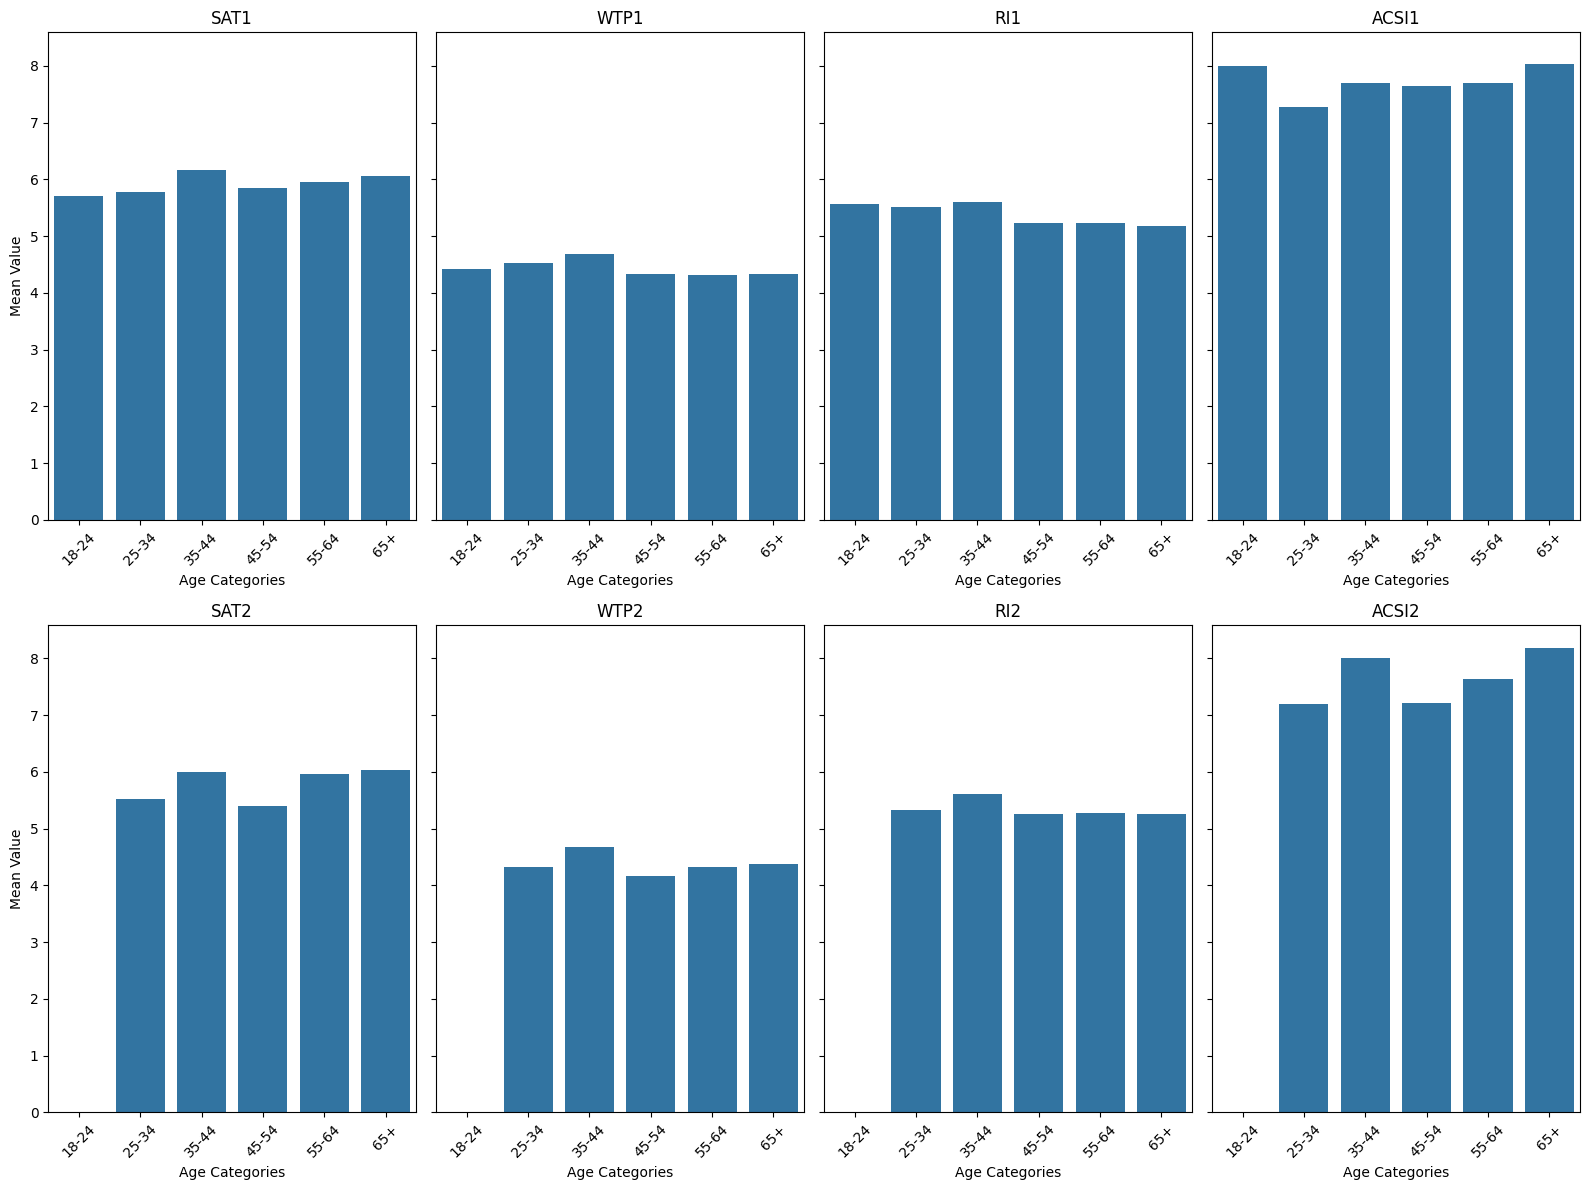

In [ ]:
age_mapping = {
    1: '18-24',
    2: '25-34',
    3: '35-44',
    4: '45-54',
    5: '55-64',
    6: '65+'
}
dfc['age_1'].replace(age_mapping, inplace=True)
columns = [col for col in dfc.columns if col[:-1].isupper() and col[:-1].isalpha()]
num_cols = 4
num_rows = len(columns) // num_cols + (len(columns) % num_cols > 0)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12), sharey=True)
axes = axes.flatten()
for i, col in enumerate(columns):
    grouped_data = dfc.groupby('age_1')[col].mean().reset_index()
    sns.barplot(x='age_1', y=col, data=grouped_data, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('Age Categories')
    axes[i].set_ylabel('Mean Value')
    axes[i].tick_params(axis='x', rotation=45)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()